In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
import random
import math




In [119]:
m=0.2
b=1.1

assign random slope value for m and b in 
y=mx+b

In [120]:
def create_linear_dataset(n):
    pos_class=n-random.randrange(1,n)
    neg_class=n-pos_class
    min_val = -20    
    max_val = 20
    m=round(random.uniform(-1,1),1)
    b=round(random.uniform(-2,2),1)
    # x1,y1 values for the +ve class
    x1 = [random.randrange(min_val, max_val) for i in range(pos_class)]
    y1 = [random.randrange(math.floor(m*x+b)+min_val, math.floor(m*x+b)) for x in x1]
    # x2,y2 values for the -ve clss 
    x2=[random.randrange(min_val,max_val) for i in range(neg_class)]
    y2=[random.randrange(math.ceil(m*x+b),max_val+math.floor(m*x+b)) for x in x2]
    data =[]
    for i in range(0,pos_class):
        data.append([1,x1[i],y1[i],1])
    for j in range(0,neg_class):
        data.append([1,x2[j],y2[j],-1])
    random.shuffle(data)
    
    return min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data

In [121]:
def sign(x):
    if x>=0:
        return 1
    else:
        return -1

In [122]:
def plot_data(x1,x2,y1,y2):
    plt.scatter(x1,y1,c="red")
    plt.scatter(x2,y2,c="green")
    plt.xlabel("x1")
    plt.ylabel("x2")

Calculate perceptron weights 
wt=w(i) + w(i)x(i) +w(i)y(i)

In [123]:
def perceptron_weights(w,x):
    return w[0]*x[0]+w[1]*x[1]+(w[2]*x[2])

from the update rule 
w(t + 1) = w(t) + y (t)x(t)

In [124]:
def update_weight(w,x):
    w[0]=w[0]+x[0]*x[3]
    w[1]=w[1]+x[1]*x[3]
    w[2]=w[2]+x[2]*x[3]
    w=[w[0],w[1],w[2]]
    return w


The f(x) here taken is mx+b, which is the line equation

In [125]:
def plot_f_x(min_val,max_val,m,b):
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)+b)

from the homework 3.a., we know that <br>
i) m = -(w[1]/w[2]) <br>
ii) b = -(w[0]/w[2])


In [126]:
def plot_g_x(weights,min_val,max_val):
    m=-(weights[1]/weights[2])
    b=-(weights[0]/weights[2])
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)+b,c="red")

In [127]:
import matplotlib.patches as mpatches

In [128]:
def perceptron_learning_algorithm(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n):
    #initial weights set to 0
    w_t=[0.0,0.0,0.0]
    iterations=0
    convergence=0
    while not convergence:
        iterations=iterations+1
        curr_ncorrect=0
        for d in data:
            if(sign(perceptron_weights(w_t,d))!=d[3]):
                w_t=update_weight(w_t,d)
            else:
                curr_ncorrect=curr_ncorrect+1
        error=1-(curr_ncorrect/n)
        print("After {} iterations the error rate is {}".format(iterations,error))
        if(curr_ncorrect==n):
            convergence=1
    plot_data(x1,x2,y1,y2)
    plot_f_x(min_val,max_val,m,b)
    plot_g_x(w_t,min_val,max_val)
    print("no of iterations taken for convergence = ",iterations)
    fx = mpatches.Patch(color='blue', label='f(x)')
    gx = mpatches.Patch(color='red', label='g(x)')
    plt.legend(handles=[fx, gx])
    plt.show()
    

4)a)<br>Generate a linearly separable 2D data set of size 30.<br>Plot the examples (points blue/red based on their classification)  <br>the target function f.

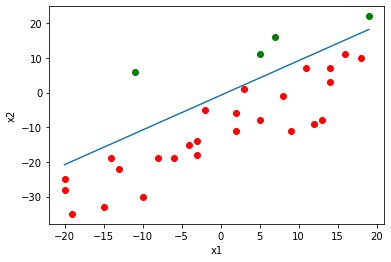

In [129]:
n=30
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

B)<br>
Run the PLA on the dataset in (A). Report the number of updates before the algorithm converges. <br>Plot the final hypothesis g and f in the same figure. Describe what you see and if the result g is close to f.

After 1 iterations the error rate is 0.16666666666666663
After 2 iterations the error rate is 0.033333333333333326
After 3 iterations the error rate is 0.0
no of iterations taken for convergence =  3


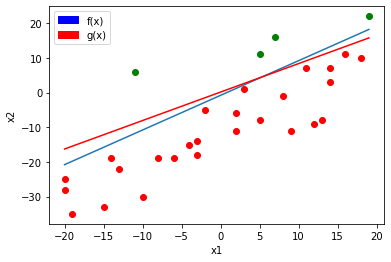

In [130]:
perceptron_learning_algorithm(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n)

C)<br>Repeat A-B with another randomly generated data set of size 30. Compare your results with B.

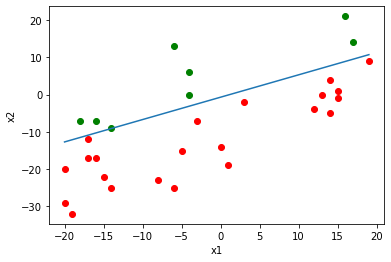

In [131]:
n=30
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

After 1 iterations the error rate is 0.30000000000000004
After 2 iterations the error rate is 0.09999999999999998
After 3 iterations the error rate is 0.06666666666666665
After 4 iterations the error rate is 0.0
no of iterations taken for convergence =  4


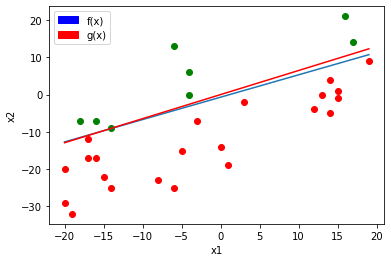

In [132]:
perceptron_learning_algorithm(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n)

D)<br>Repeat A-B with another randomly generated data set of size 1000. Compare your results with B.

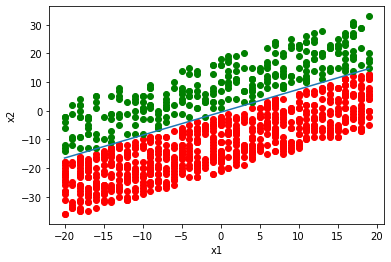

In [133]:
n=1000
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

After 1 iterations the error rate is 0.03300000000000003
After 2 iterations the error rate is 0.020000000000000018
After 3 iterations the error rate is 0.016000000000000014
After 4 iterations the error rate is 0.01100000000000001
After 5 iterations the error rate is 0.009000000000000008
After 6 iterations the error rate is 0.009000000000000008
After 7 iterations the error rate is 0.009000000000000008
After 8 iterations the error rate is 0.009000000000000008
After 9 iterations the error rate is 0.0050000000000000044
After 10 iterations the error rate is 0.0040000000000000036
After 11 iterations the error rate is 0.0030000000000000027
After 12 iterations the error rate is 0.0040000000000000036
After 13 iterations the error rate is 0.0030000000000000027
After 14 iterations the error rate is 0.0040000000000000036
After 15 iterations the error rate is 0.0040000000000000036
After 16 iterations the error rate is 0.0030000000000000027
After 17 iterations the error rate is 0.0040000000000000036

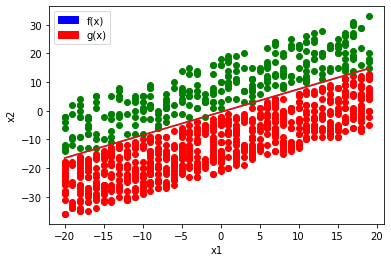

In [134]:
perceptron_learning_algorithm(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n)

In [135]:
def plot_f_x_1(min_val,max_val,m,b):
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)*np.arange(min_val,max_val)+b)

In [136]:
def plot_g_x_1(weights,min_val,max_val):
    m=-(weights[1]/weights[2])
    b=-(weights[0]/weights[2])
    plt.plot(np.arange(min_val,max_val),m*np.arange(min_val,max_val)*np.arange(min_val,max_val)+b,c="red")

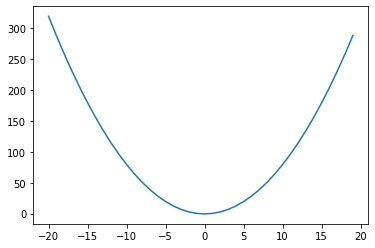

In [137]:
plot_f_x_1(min_val,max_val,m,b)

In [138]:
def create_nonlinear_dataset(n):
    pos_class=n-random.randrange(1,n)
    neg_class=n-pos_class
    min_val = -20    
    max_val = 20
    m=round(random.uniform(-1,1),1)
    b=round(random.uniform(-5,5),1)
    # x1,y1 values for the +ve class
    x1 = [random.randrange(min_val, max_val) for i in range(pos_class)]
    y1 = [random.randrange(math.floor(m*x*x+b)+min_val, math.floor(m*x*x+b)) for x in x1]
    # x2,y2 values for the -ve clss 
    x2=[random.randrange(min_val,max_val) for i in range(neg_class)]
    y2=[random.randrange(math.ceil(m*x*x+b),max_val+math.floor(m*x*x+b)) for x in x2]
    data =[]
    for i in range(0,pos_class):
        data.append([1,x1[i]*x1[i],y1[i]*y1[i],1])
    for j in range(0,neg_class):
        data.append([1,x2[j]*x2[j],y2[j]*y2[j],-1])
    random.shuffle(data)
    
    return min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data

In [139]:
def perceptron_learning_algorithm_nl(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n,iter):
    #initial weights set to 0
    w_t=[0.0,0.0,0.0]
    iterations=0
    convergence=0
    while not convergence:
        iterations=iterations+1
        if iterations<iter:
            curr_ncorrect=0
            for d in data:
                if(sign(perceptron_weights(w_t,d))!=d[3]):
                    w_t=update_weight(w_t,d)
                else:
                    curr_ncorrect=curr_ncorrect+1
            error=1 - curr_ncorrect/n
            print("After {} iterations the error rate is {}".format(iterations,error))
            plot_data(x1,x2,y1,y2)
            plot_f_x_1(min_val,max_val,m,b)
            plot_g_x_1(w_t,min_val,max_val)
            plt.show()
            if(curr_ncorrect==n):
                convergence=1
        else:
            break
    plot_data(x1,x2,y1,y2)
    plot_f_x_1(min_val,max_val,m,b)
    plot_g_x_1(w_t,min_val,max_val)
    print("no of iterations performed = ",iterations)
    fx = mpatches.Patch(color='blue', label='f(x)')
    gx = mpatches.Patch(color='red', label='g(x)')
    plt.legend(handles=[fx, gx])
    plt.show()
    

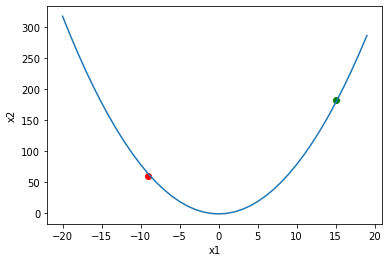

In [140]:
min_val,max_val,m,b,nl_x1,nl_x2,nl_y1,nl_y2,pos_class,neg_class,data_1=create_nonlinear_dataset(2)
plot_f_x_1(min_val,max_val,m,b)
plot_data(nl_x1,nl_x2,nl_y1,nl_y2)

After 1 iterations the error rate is 1.0


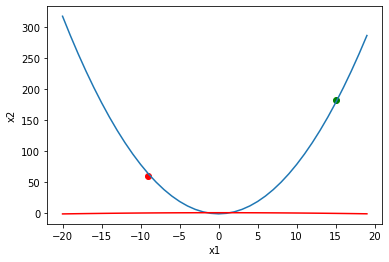

After 2 iterations the error rate is 0.5


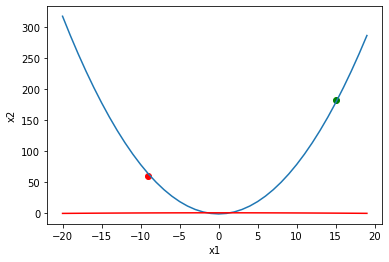

After 3 iterations the error rate is 0.5


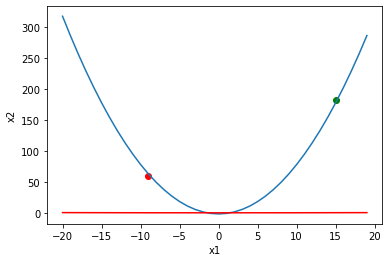

After 4 iterations the error rate is 0.5


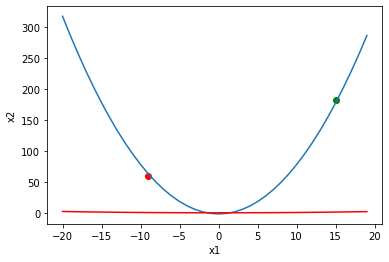

After 5 iterations the error rate is 0.5


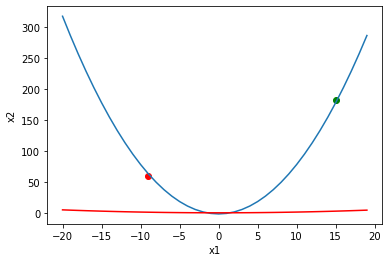

After 6 iterations the error rate is 0.5


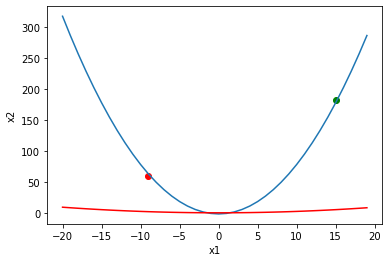

After 7 iterations the error rate is 0.5


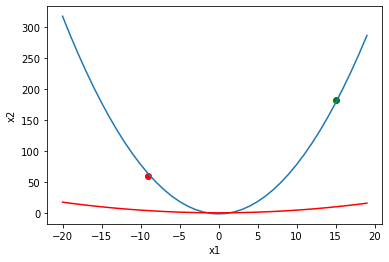

After 8 iterations the error rate is 0.5


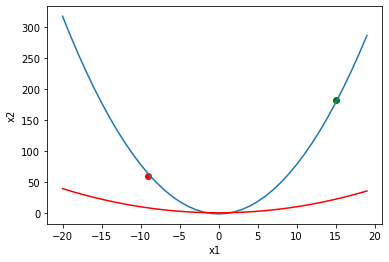

After 9 iterations the error rate is 0.5


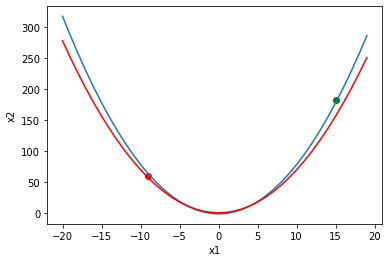

After 10 iterations the error rate is 0.5


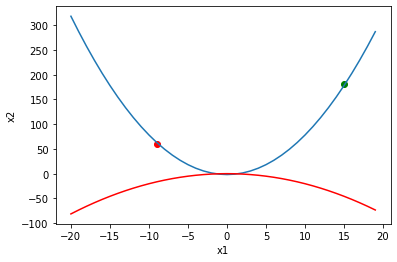

After 11 iterations the error rate is 1.0


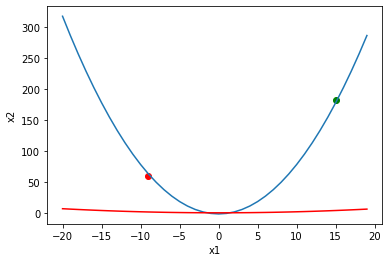

After 12 iterations the error rate is 0.5


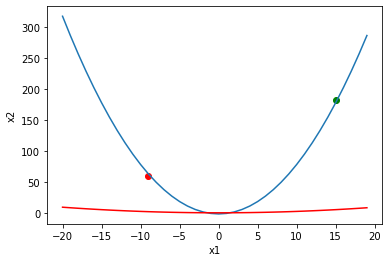

After 13 iterations the error rate is 0.5


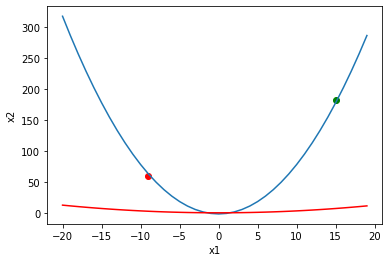

After 14 iterations the error rate is 0.5


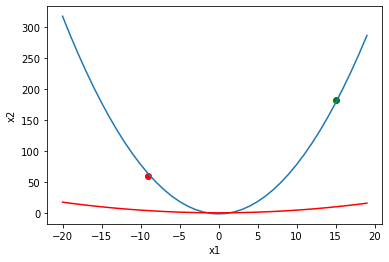

After 15 iterations the error rate is 0.5


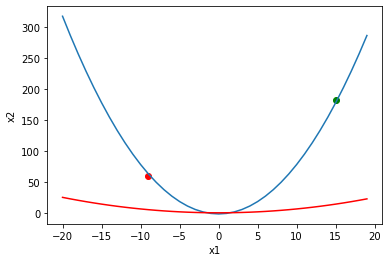

After 16 iterations the error rate is 0.5


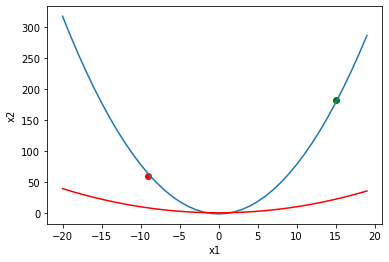

After 17 iterations the error rate is 0.5


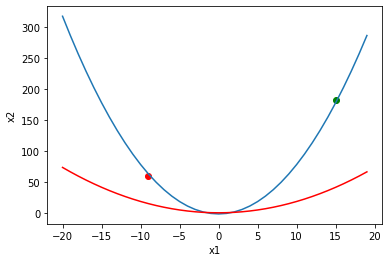

After 18 iterations the error rate is 0.5


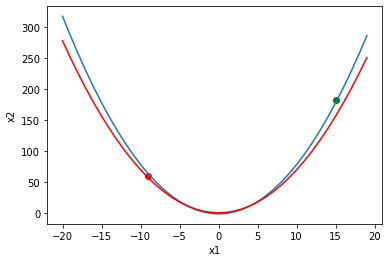

After 19 iterations the error rate is 0.5


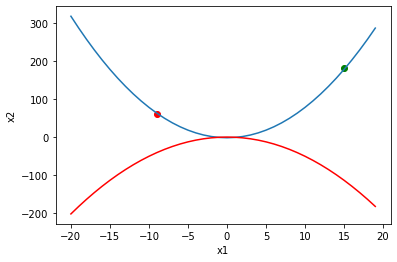

After 20 iterations the error rate is 1.0


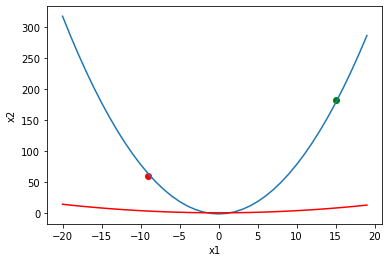

After 21 iterations the error rate is 0.5


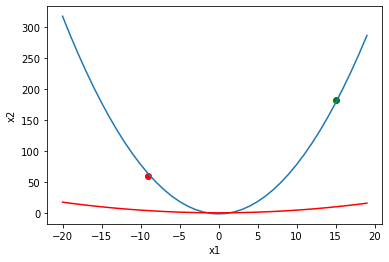

After 22 iterations the error rate is 0.5


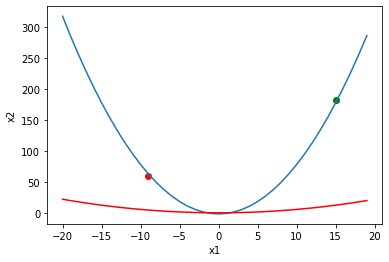

After 23 iterations the error rate is 0.5


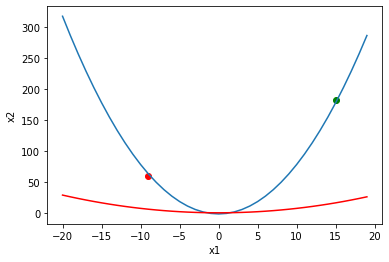

After 24 iterations the error rate is 0.5


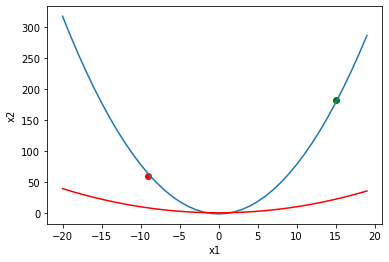

After 25 iterations the error rate is 0.5


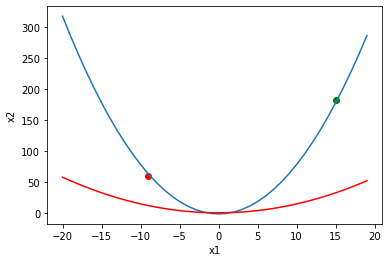

After 26 iterations the error rate is 0.5


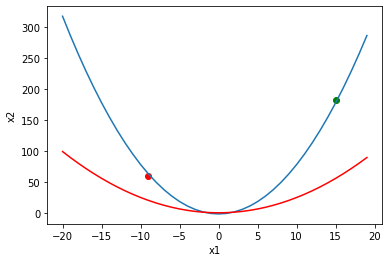

After 27 iterations the error rate is 0.5


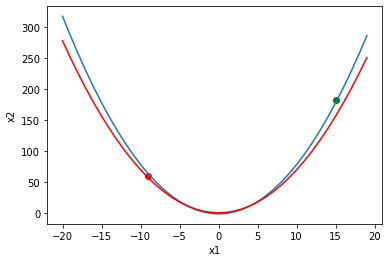

After 28 iterations the error rate is 0.5


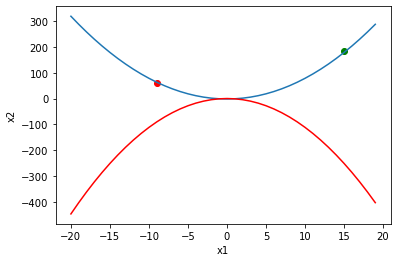

After 29 iterations the error rate is 1.0


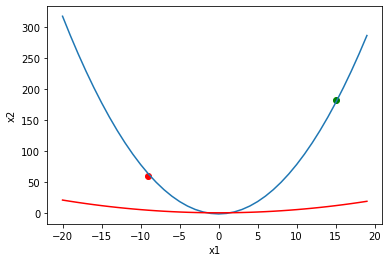

no of iterations performed =  30


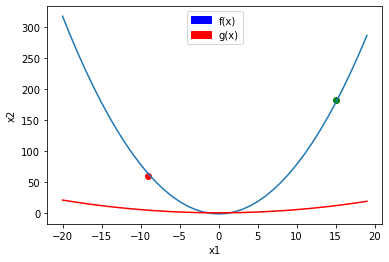

In [141]:
perceptron_learning_algorithm_nl(pos_class, neg_class, nl_x1, nl_x2, nl_y1, nl_y2, min_val,max_val, m, b,data_1,n=2,iter=30)

In [155]:
def update_weight_eta(w,x,eta,signal):
    w[0]=w[0]+eta*(signal*x[3])*x[0]
    w[1]=w[1]+eta*(signal*x[3])*x[1]
    w[2]=w[2]+eta*(signal*x[3])*x[2]
    w=[w[0],w[1],w[2]]
    return w

In [ ]:
def perceptron_weights(w,x):
    return w[0]*x[0]+w[1]*x[1]+(w[2]*x[2])

In [189]:
def perceptron_learning_algorithm_adaeline(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n,eta):
    #initial weights set to 0
    w_t=[0.0,0.0,0.0]
    iterations=0
    convergence=0
    eta=1
    while not convergence:
        iterations=iterations+1
        curr_ncorrect=0
        for d in data:
            if(sign(perceptron_weights(w_t,d))!=d[3]):
                signal=perceptron_weights(w_t,d)
                print(signal)
                w_t=update_weight_eta(w_t,d,eta,signal)
            else:
                curr_ncorrect=curr_ncorrect+1
        error=1-(curr_ncorrect/n)
        print("After {} iterations the error rate is {}".format(iterations,error))
        if(curr_ncorrect==n):
            convergence=1
    plot_data(x1,x2,y1,y2)
    plot_f_x(min_val,max_val,m,b)
    plot_g_x(w_t,min_val,max_val)
    print("no of iterations taken for convergence = ",iterations)
    fx = mpatches.Patch(color='blue', label='f(x)')
    gx = mpatches.Patch(color='red', label='g(x)')
    plt.legend(handles=[fx, gx])
    plt.show()


# def perceptron_learning_algorithm_adaeline(pos_class, neg_class, x1, x2, y1, y2, min_val,max_val, m, b,data,n,iter,eta):
#     #initial weights set to 0
#     w_t=[0.0,0.0,0.0]
#     iterations=0
#     convergence=0
#     while not convergence:
#         iterations=iterations+1
#         if iterations<iter:
#             curr_ncorrect=0
#             for d in data:
#                 if(sign(perceptron_weights(w_t,d))!=d[3]):
#                     signal=perceptron_weights(w_t,d)
#                     print(signal)
#                     w_t=update_weight_eta(w_t,d,eta,signal)
#                 else:
#                     curr_ncorrect=curr_ncorrect+1
#             error=1 - curr_ncorrect/n
#             print("After {} iterations the error rate is {}".format(iterations,error))
#             plot_data(x1,x2,y1,y2)
#             plot_f_x(min_val,max_val,m,b)
#             plot_g_x(w_t,min_val,max_val)
#             plt.show()
#             if(curr_ncorrect==n):
#                 convergence=1
#         else:
#             break
#     plot_data(x1,x2,y1,y2)
#     plot_f_x(min_val,max_val,m,b)
#     plot_g_x(w_t,min_val,max_val)
#     print("no of iterations performed = ",iterations)
#     fx = mpatches.Patch(color='blue', label='f(x)')
#     gx = mpatches.Patch(color='red', label='g(x)')
#     plt.legend(handles=[fx, gx])
#     plt.show()
    

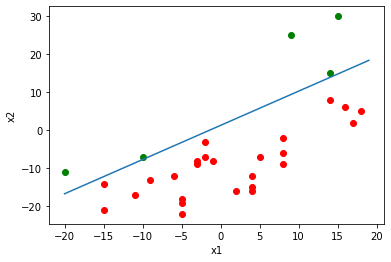

In [183]:
n=30
min_val,max_val,m,b,x1,x2,y1,y2,pos_class,neg_class,data=create_linear_dataset(n)
plot_f_x(min_val,max_val,m,b)
plot_data(x1,x2,y1,y2)

In [186]:
perceptron_learning_algorithm_adaeline(pos_class, neg_class, nl_x1, nl_x2, nl_y1, nl_y2, min_val,max_val, m, b,data_1,n=2,eta=0.001)

0.0
After 1 iterations the error rate is 0.5
0.0
After 2 iterations the error rate is 0.5
0.0
After 3 iterations the error rate is 0.5
0.0
After 4 iterations the error rate is 0.5
0.0
After 5 iterations the error rate is 0.5
0.0
After 6 iterations the error rate is 0.5
0.0
After 7 iterations the error rate is 0.5
0.0
After 8 iterations the error rate is 0.5
0.0
After 9 iterations the error rate is 0.5
0.0
After 10 iterations the error rate is 0.5
0.0
After 11 iterations the error rate is 0.5
0.0
After 12 iterations the error rate is 0.5
0.0
After 13 iterations the error rate is 0.5
0.0
After 14 iterations the error rate is 0.5
0.0
After 15 iterations the error rate is 0.5
0.0
After 16 iterations the error rate is 0.5
0.0
After 17 iterations the error rate is 0.5
0.0
After 18 iterations the error rate is 0.5
0.0
After 19 iterations the error rate is 0.5
0.0
After 20 iterations the error rate is 0.5
0.0
After 21 iterations the error rate is 0.5
0.0
After 22 iterations the error rate is 0

KeyboardInterrupt: 